In [2]:
#import the data set using pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data= pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x= data.iloc[:,[3,4]].values

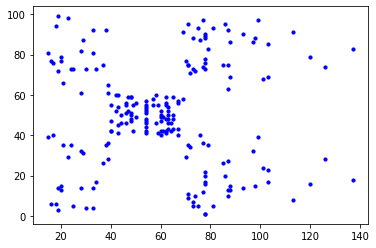

In [5]:
#plot the graph of given dataset
plt.scatter(x[:,0],x[:,1],s=10, c='blue')

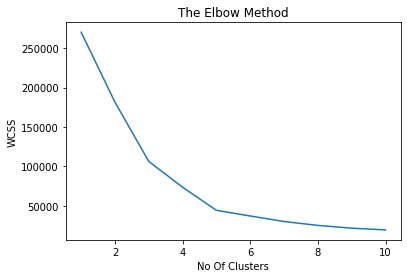

In [6]:
#find the cultest K values
#import the clusters to check the K values
from sklearn.cluster import KMeans
list1=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit_predict(x)
    list1.append(kmeans.inertia_)
plt.plot(range(1,11),list1)
plt.title("The Elbow Method")
plt.xlabel("No Of Clusters")
plt.ylabel("WCSS")
plt.show()

In [28]:
#create the model
from sklearn.cluster import OPTICS
clusmodel= OPTICS(min_samples=5)
label= clusmodel.fit_predict(x)
label

array([-1,  5,  8,  5, -1,  5,  8, -1,  8,  5,  8, -1,  8,  5,  8,  5,  0,
        5,  0, -1,  0,  5,  8,  5,  8, -1,  0, -1,  0, -1,  8,  5,  8, -1,
        8, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1, -1,  2,  2, -1,  2, -1,  2,  2, -1, -1,  2,
       -1, -1,  2, -1,  3, -1,  4,  3,  4,  4, -1,  3,  3,  4,  3,  4,  3,
       -1, -1, -1,  4,  3,  3,  4,  3,  3, -1,  4,  3,  3,  3,  4, -1, -1,
       -1, -1, -1, -1, 10, -1,  9, -1, 10, -1,  9,  6,  9, -1,  9,  6, 10,
        6,  9,  6,  9,  6, 10, -1, 10, -1, 10, -1,  9, -1, 10, -1, 10, -1,
        9, -1, 10,  6,  9,  6,  9, -1,  9,  6, 10,  7, -1,  7, 10,  7, -1,
        7, -1,  7, 10,  7, 10,  7, -1,  7, -1, -1, -1,  7, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [29]:
supervised= pd.DataFrame(data)

In [30]:
supervised["Cluster Group"]= label

In [31]:
supervised.to_csv("Cluster_OPTICS.csv",index=False)

In [32]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster Group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,5
2,3,Female,20,16,6,8
3,4,Female,23,16,77,5
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [ ]:
#centroids

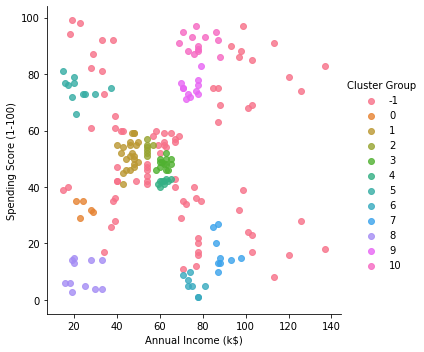

In [33]:
import seaborn as sns
fact= sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],
                 fit_reg=False,legend=True,legend_out=True)